---

In [1]:
# Useful packages
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn import preprocessing
from sklearn.cluster import KMeans

In [2]:
# Package for dataviz
import matplotlib.pyplot as plt

---

In [3]:
# Import the dataset from the Notebook 3
df = pd.read_csv(r'../output/cleaned/complete_dataframe.csv')

# Backup the dataframe in a new dataframe
df1 = df.copy()

In [4]:
# Display the first 2 rows
df1.head(2)

,Département,Chef-Lieu ou Capitale,Superficie (km²),adm0code,Population,Density/km²,address,lat,lon,clinic,doctors,hospital,pharmacy,Cas cumulés,Nouveau cas,Décès cumulés,Nouveaux décès,positivité,létalité,airport
0,Artibonite,Les Gonaïves,4984,HT,2047152,412,"Les Gonaïves, Arrondissement des Gonaïves, Dép...",19.446060,-72.688434,10.0,17.0,184.0,81.0,443,0,34,1,0.395,0.077,0.0
1,Centre,Hinche,3675,HT,845594,231,"Hinche, Arrondissement de Hinche, Département ...",19.144554,-72.008753,0.0,0.0,73.0,21.0,378,0,5,1,0.447,0.013,0.0


---

In [5]:
# Compute new agregate values from existed ones to create new features for a fair comparison

# Number of clinic available for 100.000 peoples
df1['clinic_per_100000'] = df1['clinic']/(df1['Population'] /100000)

# Number of private clinic available for 100.000 peoples
df1['doctor_per_100000'] = df1['doctors']/(df1['Population'] /100000)

# Number of hospital available for 100.000 peoples
df1['hospital_per_100000'] = df1['hospital']/(df1['Population'] /100000)

# Number of tested cases
df1['tested_case'] = df1['Cas cumulés'] / df1['positivité']

# Number of tested case per 100.000 peoples
df1['tested_case_per_100000'] = df1['tested_case']/(df1['Population'] /100000)

In [6]:
# Display the dataframe
df1.head()

,Département,Chef-Lieu ou Capitale,Superficie (km²),adm0code,Population,Density/km²,address,lat,lon,clinic,...,Décès cumulés,Nouveaux décès,positivité,létalité,airport,clinic_per_100000,doctor_per_100000,hospital_per_100000,tested_case,tested_case_per_100000
0,Artibonite,Les Gonaïves,4984,HT,2047152,412,"Les Gonaïves, Arrondissement des Gonaïves, Dép...",19.446060,-72.688434,10.0,...,34,1,0.395,0.077,0.0,0.488484,0.830422,8.988097,1121.518987,54.784353
1,Centre,Hinche,3675,HT,845594,231,"Hinche, Arrondissement de Hinche, Département ...",19.144554,-72.008753,0.0,...,5,1,0.447,0.013,0.0,0.000000,0.000000,8.632985,845.637584,100.005154
2,Grande'Anse,Jérémie,1871,HT,481065,258,"Jérémie, Arrondissement de Jérémie, Départemen...",18.644583,-74.113918,4.0,...,12,0,0.470,0.078,1.0,0.831488,0.000000,13.303815,327.659574,68.111289
3,Nippes,Miragoâne,1268,HT,351593,278,"Miragoâne, Arrondissement de Miragoâne, Départ...",18.444843,-73.088639,1.0,...,4,0,0.399,0.032,0.0,0.284420,0.000000,10.807951,310.776942,88.391106
4,Nord,Cap-Haïtien,2106,HT,1159761,552,"Cap-Haïtien, Arrondissement de Cap-Haïtien, Dé...",19.759524,-72.200807,30.0,...,25,0,0.471,0.069,1.0,2.586740,0.603573,9.226039,764.331210,65.904200


In [7]:
# Inject columns freshly created on a new dataframe
new_df = df1[['Département', 'Density/km²', 'clinic_per_100000', 'doctor_per_100000', 'hospital_per_100000', 'tested_case_per_100000', 'positivité', 'létalité', 'airport']]
new_df

,Département,Density/km²,clinic_per_100000,doctor_per_100000,hospital_per_100000,tested_case_per_100000,positivité,létalité,airport
0,Artibonite,412,0.488484,0.830422,8.988097,54.784353,0.395,0.077,0.0
1,Centre,231,0.000000,0.000000,8.632985,100.005154,0.447,0.013,0.0
2,Grande'Anse,258,0.831488,0.000000,13.303815,68.111289,0.470,0.078,1.0
3,Nippes,278,0.284420,0.000000,10.807951,88.391106,0.399,0.032,0.0
4,Nord,552,2.586740,0.603573,9.226039,65.904200,0.471,0.069,1.0
5,Nord-Est,247,5.174784,0.000000,12.374483,172.333231,0.235,0.028,0.0
6,Nord-Ouest,400,0.230261,0.000000,10.246609,46.160791,0.424,0.059,1.0
7,Ouest,1039,1.476985,0.638696,8.283094,271.012520,0.396,0.014,3.0
8,Sud,284,0.379226,1.137679,14.031380,48.797525,0.544,0.029,1.0
9,Sud-Est,443,0.111869,0.111869,8.725808,49.796910,0.483,0.037,1.0


---

## Now we will compute a score based on each numerical features and their weights   
- It's important to specify that each weight is assigned based on an arbitrary choice backed up on the importance of the feature in term of COVID-19 risk 

### The weight by feature is listed in the table below   


|    | Features               |   Weights |
|---:|:-----------------------|----------:|
|  0 | Density/km²            |         1 |
|  1 | clinic_per_100000      |        -2 |
|  2 | doctor_per_100000      |        -2 |
|  3 | hospital_per_100000    |        -3 |
|  4 | tested_case_per_100000 |        -2 |
|  5 | positivité             |         3 |
|  6 | létalité               |         4 |
|  7 | airport                |         1 |

In [8]:
# List of the weight of each features in our model
weight_list = [1, -2, -2, -3, -2, 3, 4, 1]

# List of the features
features_list = new_df.columns.tolist()[1:]

# Code to render the table to markdown like the one above this cell (uncomment to create new one)
#features_weight = pd.DataFrame({'Features':features_list, 'Weights':weight_list})
# print(features_weight.to_markdown())

# Now let's compute our score (covid risk indicator) for each department

## First we must normalize each features so they can range from 0 to 1   

- By doing so, our score will range from -18 to 18

<!--normalized_X = preprocessing.normalize(new_df.iloc[:,1:])
normalized_X
standardized_X = preprocessing.scale(new_df.iloc[:,1:])
standardized_X
new_df.iloc[:,1:]-->
---

In [9]:
# Create a new dataframe with all numerical features
df_score = new_df.iloc[:,1:]

In [10]:
df_score

,Density/km²,clinic_per_100000,doctor_per_100000,hospital_per_100000,tested_case_per_100000,positivité,létalité,airport
0,412,0.488484,0.830422,8.988097,54.784353,0.395,0.077,0.0
1,231,0.000000,0.000000,8.632985,100.005154,0.447,0.013,0.0
2,258,0.831488,0.000000,13.303815,68.111289,0.470,0.078,1.0
3,278,0.284420,0.000000,10.807951,88.391106,0.399,0.032,0.0
4,552,2.586740,0.603573,9.226039,65.904200,0.471,0.069,1.0
5,247,5.174784,0.000000,12.374483,172.333231,0.235,0.028,0.0
6,400,0.230261,0.000000,10.246609,46.160791,0.424,0.059,1.0
7,1039,1.476985,0.638696,8.283094,271.012520,0.396,0.014,3.0
8,284,0.379226,1.137679,14.031380,48.797525,0.544,0.029,1.0
9,443,0.111869,0.111869,8.725808,49.796910,0.483,0.037,1.0


In [11]:
x = df_score.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler() # Instantiate the Scaler
x_scaled = min_max_scaler.fit_transform(x) # Scale our features, now they all range from 0 to 1
df_score_1 = pd.DataFrame(x_scaled) # Create a dataframe with these new values
df_score_1

,0,1,2,3,4,5,6,7
0,0.224010,0.094397,0.729926,0.122646,0.038352,0.517799,0.984615,0.000000
1,0.000000,0.000000,0.000000,0.060869,0.239466,0.686084,0.000000,0.000000
2,0.033416,0.160681,0.000000,0.873429,0.097622,0.760518,1.000000,0.333333
3,0.058168,0.054963,0.000000,0.439237,0.187814,0.530744,0.292308,0.000000
4,0.397277,0.499874,0.530530,0.164039,0.087806,0.763754,0.861538,0.333333
5,0.019802,1.000000,0.000000,0.711758,0.561136,0.000000,0.230769,0.000000
6,0.209158,0.044497,0.000000,0.341583,0.000000,0.611650,0.707692,0.333333
7,1.000000,0.285420,0.561403,0.000000,1.000000,0.521036,0.015385,1.000000
8,0.065594,0.073284,1.000000,1.000000,0.011727,1.000000,0.246154,0.333333
9,0.262376,0.021618,0.098331,0.077017,0.016171,0.802589,0.369231,0.333333


In [12]:
# Inject the departments name to the new dataframe so we can label each row
df_score_1['Département'] = new_df['Département']

In [13]:
list__ = ['Département']
for i in df_score_1.columns.tolist()[:-1]:
    list__.append(i)
list__

['Département', 0, 1, 2, 3, 4, 5, 6, 7]

In [14]:
df_score_1 = df_score_1[list__]
df_score_1

,Département,0,1,2,3,4,5,6,7
0,Artibonite,0.224010,0.094397,0.729926,0.122646,0.038352,0.517799,0.984615,0.000000
1,Centre,0.000000,0.000000,0.000000,0.060869,0.239466,0.686084,0.000000,0.000000
2,Grande'Anse,0.033416,0.160681,0.000000,0.873429,0.097622,0.760518,1.000000,0.333333
3,Nippes,0.058168,0.054963,0.000000,0.439237,0.187814,0.530744,0.292308,0.000000
4,Nord,0.397277,0.499874,0.530530,0.164039,0.087806,0.763754,0.861538,0.333333
5,Nord-Est,0.019802,1.000000,0.000000,0.711758,0.561136,0.000000,0.230769,0.000000
6,Nord-Ouest,0.209158,0.044497,0.000000,0.341583,0.000000,0.611650,0.707692,0.333333
7,Ouest,1.000000,0.285420,0.561403,0.000000,1.000000,0.521036,0.015385,1.000000
8,Sud,0.065594,0.073284,1.000000,1.000000,0.011727,1.000000,0.246154,0.333333
9,Sud-Est,0.262376,0.021618,0.098331,0.077017,0.016171,0.802589,0.369231,0.333333


In [15]:
new_df_1 = pd.DataFrame()
for a, b in zip(new_df.columns.tolist(), df_score_1.columns.tolist()):
    new_df_1[a] = df_score_1[b]

new_df_1

,Département,Density/km²,clinic_per_100000,doctor_per_100000,hospital_per_100000,tested_case_per_100000,positivité,létalité,airport
0,Artibonite,0.224010,0.094397,0.729926,0.122646,0.038352,0.517799,0.984615,0.000000
1,Centre,0.000000,0.000000,0.000000,0.060869,0.239466,0.686084,0.000000,0.000000
2,Grande'Anse,0.033416,0.160681,0.000000,0.873429,0.097622,0.760518,1.000000,0.333333
3,Nippes,0.058168,0.054963,0.000000,0.439237,0.187814,0.530744,0.292308,0.000000
4,Nord,0.397277,0.499874,0.530530,0.164039,0.087806,0.763754,0.861538,0.333333
5,Nord-Est,0.019802,1.000000,0.000000,0.711758,0.561136,0.000000,0.230769,0.000000
6,Nord-Ouest,0.209158,0.044497,0.000000,0.341583,0.000000,0.611650,0.707692,0.333333
7,Ouest,1.000000,0.285420,0.561403,0.000000,1.000000,0.521036,0.015385,1.000000
8,Sud,0.065594,0.073284,1.000000,1.000000,0.011727,1.000000,0.246154,0.333333
9,Sud-Est,0.262376,0.021618,0.098331,0.077017,0.016171,0.802589,0.369231,0.333333


---

* #### Old code (double-click to display)
<!--new_df_1['score'] = new_df_1.positivité*3 + new_df_1.létalité*4 + new_df_1.tested_case_per_100000*(-2) + new_df_1.hospital_per_100000*(-3) + new_df_1.doctor_per_100000*(-2) + new_df_1.clinic_per_100000*(-2) + new_df_1['Density/km²']*1 + new_df_1.airport*1
new_df_1
-->

In [16]:
######################################################## OPTIMIZED #######################################################


# Create a new column an fill it with zeros
new_df_1['score'] = np.zeros((10,1))

# Iterate through each weight and features to compute the score
for coef, feat in zip(weight_list, features_list):
    new_df_1['score'] += coef*(new_df_1[feat])

new_df_1

,Département,Density/km²,clinic_per_100000,doctor_per_100000,hospital_per_100000,tested_case_per_100000,positivité,létalité,airport,score
0,Artibonite,0.224010,0.094397,0.729926,0.122646,0.038352,0.517799,0.984615,0.000000,3.622582
1,Centre,0.000000,0.000000,0.000000,0.060869,0.239466,0.686084,0.000000,0.000000,1.396714
2,Grande'Anse,0.033416,0.160681,0.000000,0.873429,0.097622,0.760518,1.000000,0.333333,3.511409
3,Nippes,0.058168,0.054963,0.000000,0.439237,0.187814,0.530744,0.292308,0.000000,1.016369
4,Nord,0.397277,0.499874,0.530530,0.164039,0.087806,0.763754,0.861538,0.333333,3.739489
5,Nord-Est,0.019802,1.000000,0.000000,0.711758,0.561136,0.000000,0.230769,0.000000,-4.314668
6,Nord-Ouest,0.209158,0.044497,0.000000,0.341583,0.000000,0.611650,0.707692,0.333333,4.094471
7,Ouest,1.000000,0.285420,0.561403,0.000000,1.000000,0.521036,0.015385,1.000000,-0.069000
8,Sud,0.065594,0.073284,1.000000,1.000000,0.011727,1.000000,0.246154,0.333333,-0.786477
9,Sud-Est,0.262376,0.021618,0.098331,0.077017,0.016171,0.802589,0.369231,0.333333,3.977108


In [17]:
# Create a new column in the first dataframe with our real values to add the scores
new_df['score'] = new_df_1['score']

new_df

C:\Users\dadyf\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Département,Density/km²,clinic_per_100000,doctor_per_100000,hospital_per_100000,tested_case_per_100000,positivité,létalité,airport,score
0,Artibonite,412,0.488484,0.830422,8.988097,54.784353,0.395,0.077,0.0,3.622582
1,Centre,231,0.000000,0.000000,8.632985,100.005154,0.447,0.013,0.0,1.396714
2,Grande'Anse,258,0.831488,0.000000,13.303815,68.111289,0.470,0.078,1.0,3.511409
3,Nippes,278,0.284420,0.000000,10.807951,88.391106,0.399,0.032,0.0,1.016369
4,Nord,552,2.586740,0.603573,9.226039,65.904200,0.471,0.069,1.0,3.739489
5,Nord-Est,247,5.174784,0.000000,12.374483,172.333231,0.235,0.028,0.0,-4.314668
6,Nord-Ouest,400,0.230261,0.000000,10.246609,46.160791,0.424,0.059,1.0,4.094471
7,Ouest,1039,1.476985,0.638696,8.283094,271.012520,0.396,0.014,3.0,-0.069000
8,Sud,284,0.379226,1.137679,14.031380,48.797525,0.544,0.029,1.0,-0.786477
9,Sud-Est,443,0.111869,0.111869,8.725808,49.796910,0.483,0.037,1.0,3.977108


---

In [18]:
# Standardize features

# Use RobustScaler to take in count outliers
scaler = RobustScaler()
X_std = scaler.fit_transform(new_df.iloc[:,1:])

Double-click here if the cell below raise an error
<!--
!pip install yellowbrick
-->

C:\Users\dadyf\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


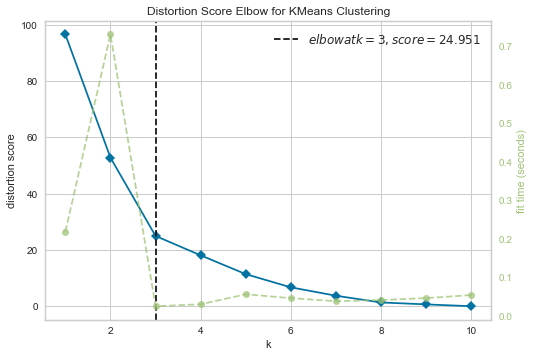

In [19]:
from yellowbrick.cluster import KElbowVisualizer

# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,11))

visualizer.fit(X_std)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

## We can easily see that the optimal number of cluster is 3

In [20]:
# Create k-mean object
clt = KMeans(n_clusters=3, random_state=0, n_jobs=-1)

# Train model
model = clt.fit(X_std)

In [21]:
# View predict class
model.labels_

array([0, 0, 0, 0, 0, 2, 0, 1, 0, 0])

In [22]:
# Normalize the score to get ride of negative and low values hard to compare, so we can get a score which ranges
# from 0 to 10, as the score is a relative value
new_df['normalized_score'] = round(((new_df.score - new_df.score.min()) / (new_df.score.max() - new_df.score.min())) * 10, 2)

C:\Users\dadyf\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [23]:
# Linked the cluster labels to each department
new_df['cluster_label'] = model.labels_
new_df

C:\Users\dadyf\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Département,Density/km²,clinic_per_100000,doctor_per_100000,hospital_per_100000,tested_case_per_100000,positivité,létalité,airport,score,normalized_score,cluster_label
0,Artibonite,412,0.488484,0.830422,8.988097,54.784353,0.395,0.077,0.0,3.622582,9.44,0
1,Centre,231,0.000000,0.000000,8.632985,100.005154,0.447,0.013,0.0,1.396714,6.79,0
2,Grande'Anse,258,0.831488,0.000000,13.303815,68.111289,0.470,0.078,1.0,3.511409,9.31,0
3,Nippes,278,0.284420,0.000000,10.807951,88.391106,0.399,0.032,0.0,1.016369,6.34,0
4,Nord,552,2.586740,0.603573,9.226039,65.904200,0.471,0.069,1.0,3.739489,9.58,0
5,Nord-Est,247,5.174784,0.000000,12.374483,172.333231,0.235,0.028,0.0,-4.314668,0.00,2
6,Nord-Ouest,400,0.230261,0.000000,10.246609,46.160791,0.424,0.059,1.0,4.094471,10.00,0
7,Ouest,1039,1.476985,0.638696,8.283094,271.012520,0.396,0.014,3.0,-0.069000,5.05,1
8,Sud,284,0.379226,1.137679,14.031380,48.797525,0.544,0.029,1.0,-0.786477,4.20,0
9,Sud-Est,443,0.111869,0.111869,8.725808,49.796910,0.483,0.037,1.0,3.977108,9.86,0


### Let's see which department falls in the cluster with label 0

In [24]:
new_df[new_df.cluster_label == 0]

,Département,Density/km²,clinic_per_100000,doctor_per_100000,hospital_per_100000,tested_case_per_100000,positivité,létalité,airport,score,normalized_score,cluster_label
0,Artibonite,412,0.488484,0.830422,8.988097,54.784353,0.395,0.077,0.0,3.622582,9.44,0
1,Centre,231,0.000000,0.000000,8.632985,100.005154,0.447,0.013,0.0,1.396714,6.79,0
2,Grande'Anse,258,0.831488,0.000000,13.303815,68.111289,0.470,0.078,1.0,3.511409,9.31,0
3,Nippes,278,0.284420,0.000000,10.807951,88.391106,0.399,0.032,0.0,1.016369,6.34,0
4,Nord,552,2.586740,0.603573,9.226039,65.904200,0.471,0.069,1.0,3.739489,9.58,0
6,Nord-Ouest,400,0.230261,0.000000,10.246609,46.160791,0.424,0.059,1.0,4.094471,10.00,0
8,Sud,284,0.379226,1.137679,14.031380,48.797525,0.544,0.029,1.0,-0.786477,4.20,0
9,Sud-Est,443,0.111869,0.111869,8.725808,49.796910,0.483,0.037,1.0,3.977108,9.86,0


In [25]:
new_df[new_df.cluster_label == 0].describe()

,Density/km²,clinic_per_100000,doctor_per_100000,hospital_per_100000,tested_case_per_100000,positivité,létalité,airport,score,normalized_score,cluster_label
count,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.00000,8.000000,8.000000,8.000000,8.0
mean,357.250000,0.614061,0.335443,10.495336,65.243916,0.454125,0.04925,0.625000,2.571458,8.190000,0.0
std,111.829909,0.836223,0.456783,2.105544,19.768141,0.049195,0.02465,0.517549,1.801671,2.141982,0.0
min,231.000000,0.000000,0.000000,8.632985,46.160791,0.395000,0.01300,0.000000,-0.786477,4.200000,0.0
25%,273.000000,0.200663,0.000000,8.922525,49.547063,0.417750,0.03125,0.000000,1.301628,6.677500,0.0
50%,342.000000,0.331823,0.055935,9.736324,60.344277,0.458500,0.04800,1.000000,3.566995,9.375000,0.0
75%,419.750000,0.574235,0.660285,11.431917,73.181244,0.474000,0.07100,1.000000,3.798894,9.650000,0.0
max,552.000000,2.586740,1.137679,14.031380,100.005154,0.544000,0.07800,1.000000,4.094471,10.000000,0.0


* So each one of these departments *are similar in term of COVID-19 risk* based on our available features
* They have an **Average Score of 2.57** and this score vary to 1.8 around the mean

In [26]:
new_df[new_df.cluster_label == 1]

,Département,Density/km²,clinic_per_100000,doctor_per_100000,hospital_per_100000,tested_case_per_100000,positivité,létalité,airport,score,normalized_score,cluster_label
7,Ouest,1039,1.476985,0.638696,8.283094,271.01252,0.396,0.014,3.0,-0.069,5.05,1


* This department falls alone in a cluster because, based on our features, there is no similarity to it.
* The score is pretty low compared to the average score of the previews cluster

In [27]:
new_df[new_df.cluster_label == 2]

,Département,Density/km²,clinic_per_100000,doctor_per_100000,hospital_per_100000,tested_case_per_100000,positivité,létalité,airport,score,normalized_score,cluster_label
5,Nord-Est,247,5.174784,0.0,12.374483,172.333231,0.235,0.028,0.0,-4.314668,0.0,2


* This department falls also alone in a cluster
* The score is the lowest of all the departments

### So we can say that, relatively to the other departments, according to our score, it's the safest place in term of COVID-19 risk

In [28]:
# Rank the departments according to their score
new_df['rank'] = new_df['score'].rank()

# Sort the dataframe from least risky to most risky
new_df.sort_values('rank')

C:\Users\dadyf\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Département,Density/km²,clinic_per_100000,doctor_per_100000,hospital_per_100000,tested_case_per_100000,positivité,létalité,airport,score,normalized_score,cluster_label,rank
5,Nord-Est,247,5.174784,0.000000,12.374483,172.333231,0.235,0.028,0.0,-4.314668,0.00,2,1.0
8,Sud,284,0.379226,1.137679,14.031380,48.797525,0.544,0.029,1.0,-0.786477,4.20,0,2.0
7,Ouest,1039,1.476985,0.638696,8.283094,271.012520,0.396,0.014,3.0,-0.069000,5.05,1,3.0
3,Nippes,278,0.284420,0.000000,10.807951,88.391106,0.399,0.032,0.0,1.016369,6.34,0,4.0
1,Centre,231,0.000000,0.000000,8.632985,100.005154,0.447,0.013,0.0,1.396714,6.79,0,5.0
2,Grande'Anse,258,0.831488,0.000000,13.303815,68.111289,0.470,0.078,1.0,3.511409,9.31,0,6.0
0,Artibonite,412,0.488484,0.830422,8.988097,54.784353,0.395,0.077,0.0,3.622582,9.44,0,7.0
4,Nord,552,2.586740,0.603573,9.226039,65.904200,0.471,0.069,1.0,3.739489,9.58,0,8.0
9,Sud-Est,443,0.111869,0.111869,8.725808,49.796910,0.483,0.037,1.0,3.977108,9.86,0,9.0
6,Nord-Ouest,400,0.230261,0.000000,10.246609,46.160791,0.424,0.059,1.0,4.094471,10.00,0,10.0


In [29]:
# Export the dataframe to a .CSV file so we can use it later
new_df.to_csv(r'../output/cleaned/scored_clustered_departments.csv', index=False)